[====================================================================================================] 100%LA MINA CERREJON  - AUT [15065501].csv
POZO HONDO [15067130].csv
CAMP INTERCOR [15065050].csv
[1, 31, 1, 4, 3, 0, 4, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 3, 33, 1, 3, 0, 6, 1, 3, 3, 12, 11, 42]
1.64 % LA MINA CERREJON  - AUT [15065501].csv
[0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.08 % POZO HONDO [15067130].csv
[1, 275, 59, 8, 8, 7, 191, 86, 55, 5, 12, 0, 0, 47, 98, 212, 339, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 181]
52.92 % CAMP INTERCOR [15065050].csv
10408


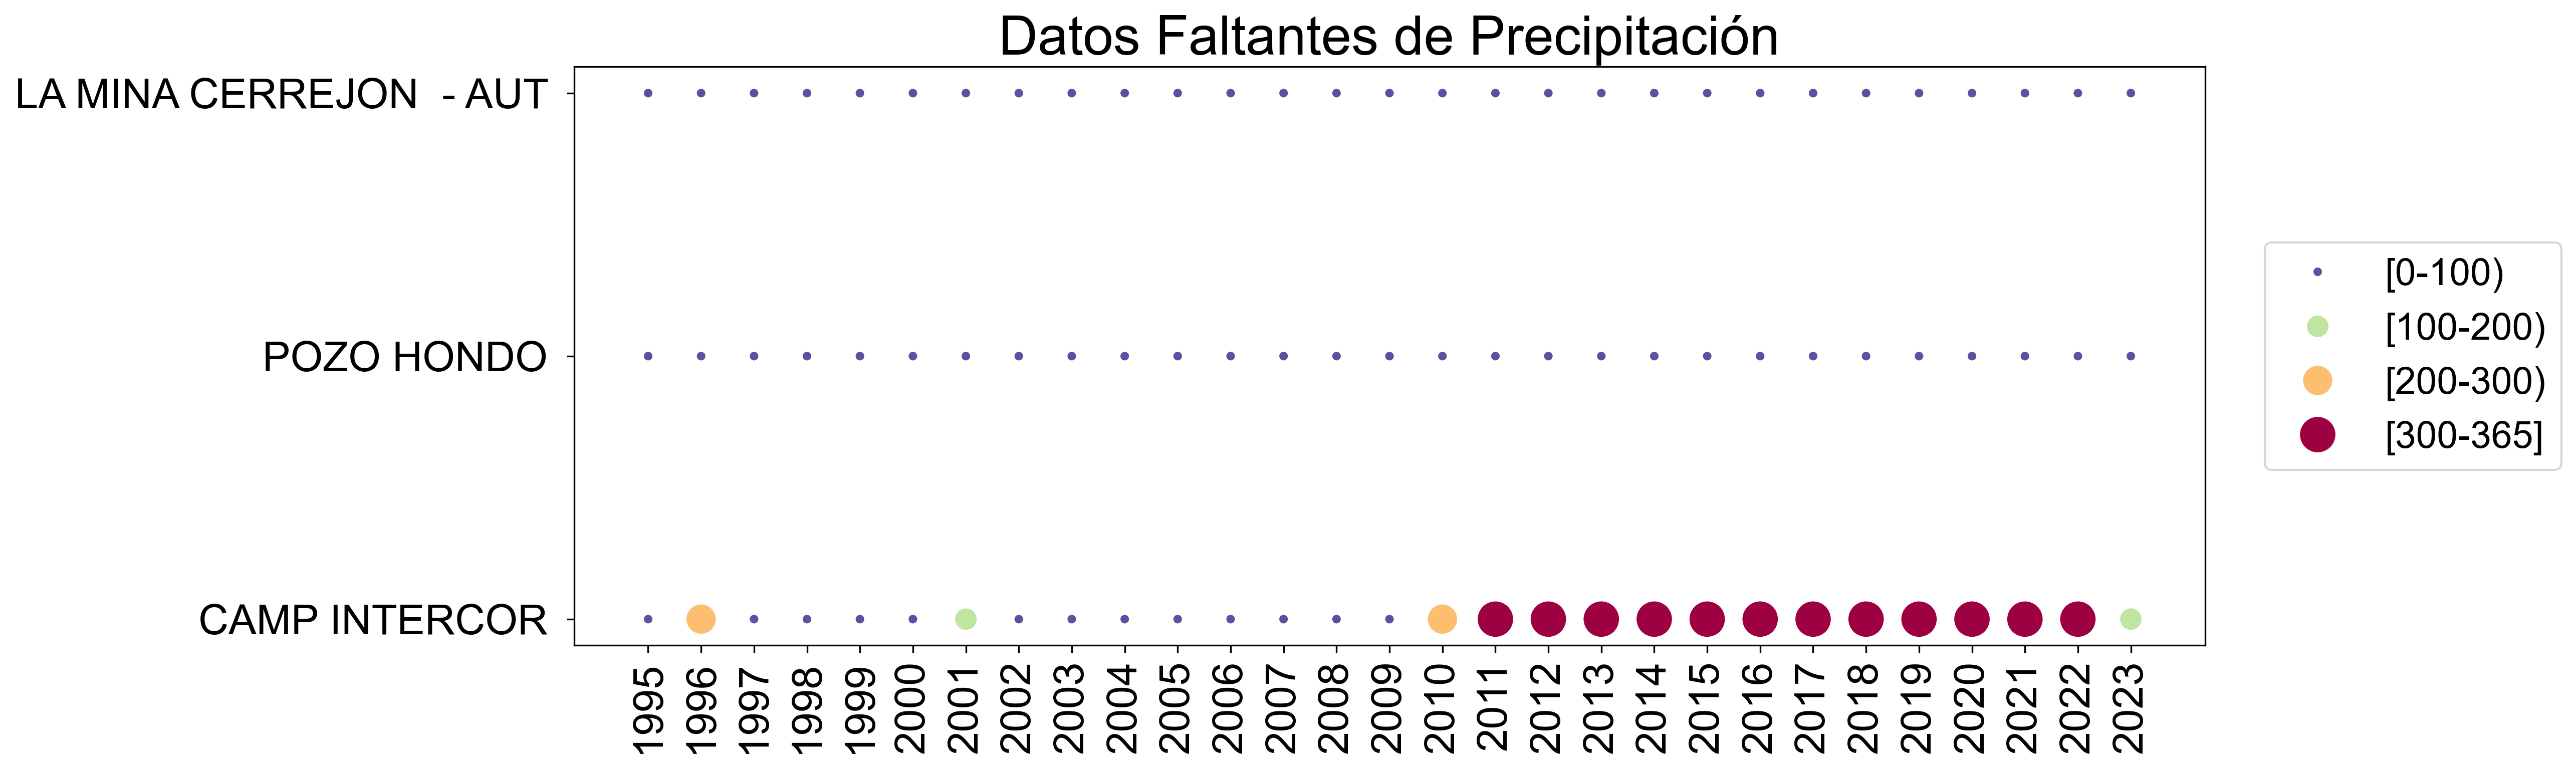

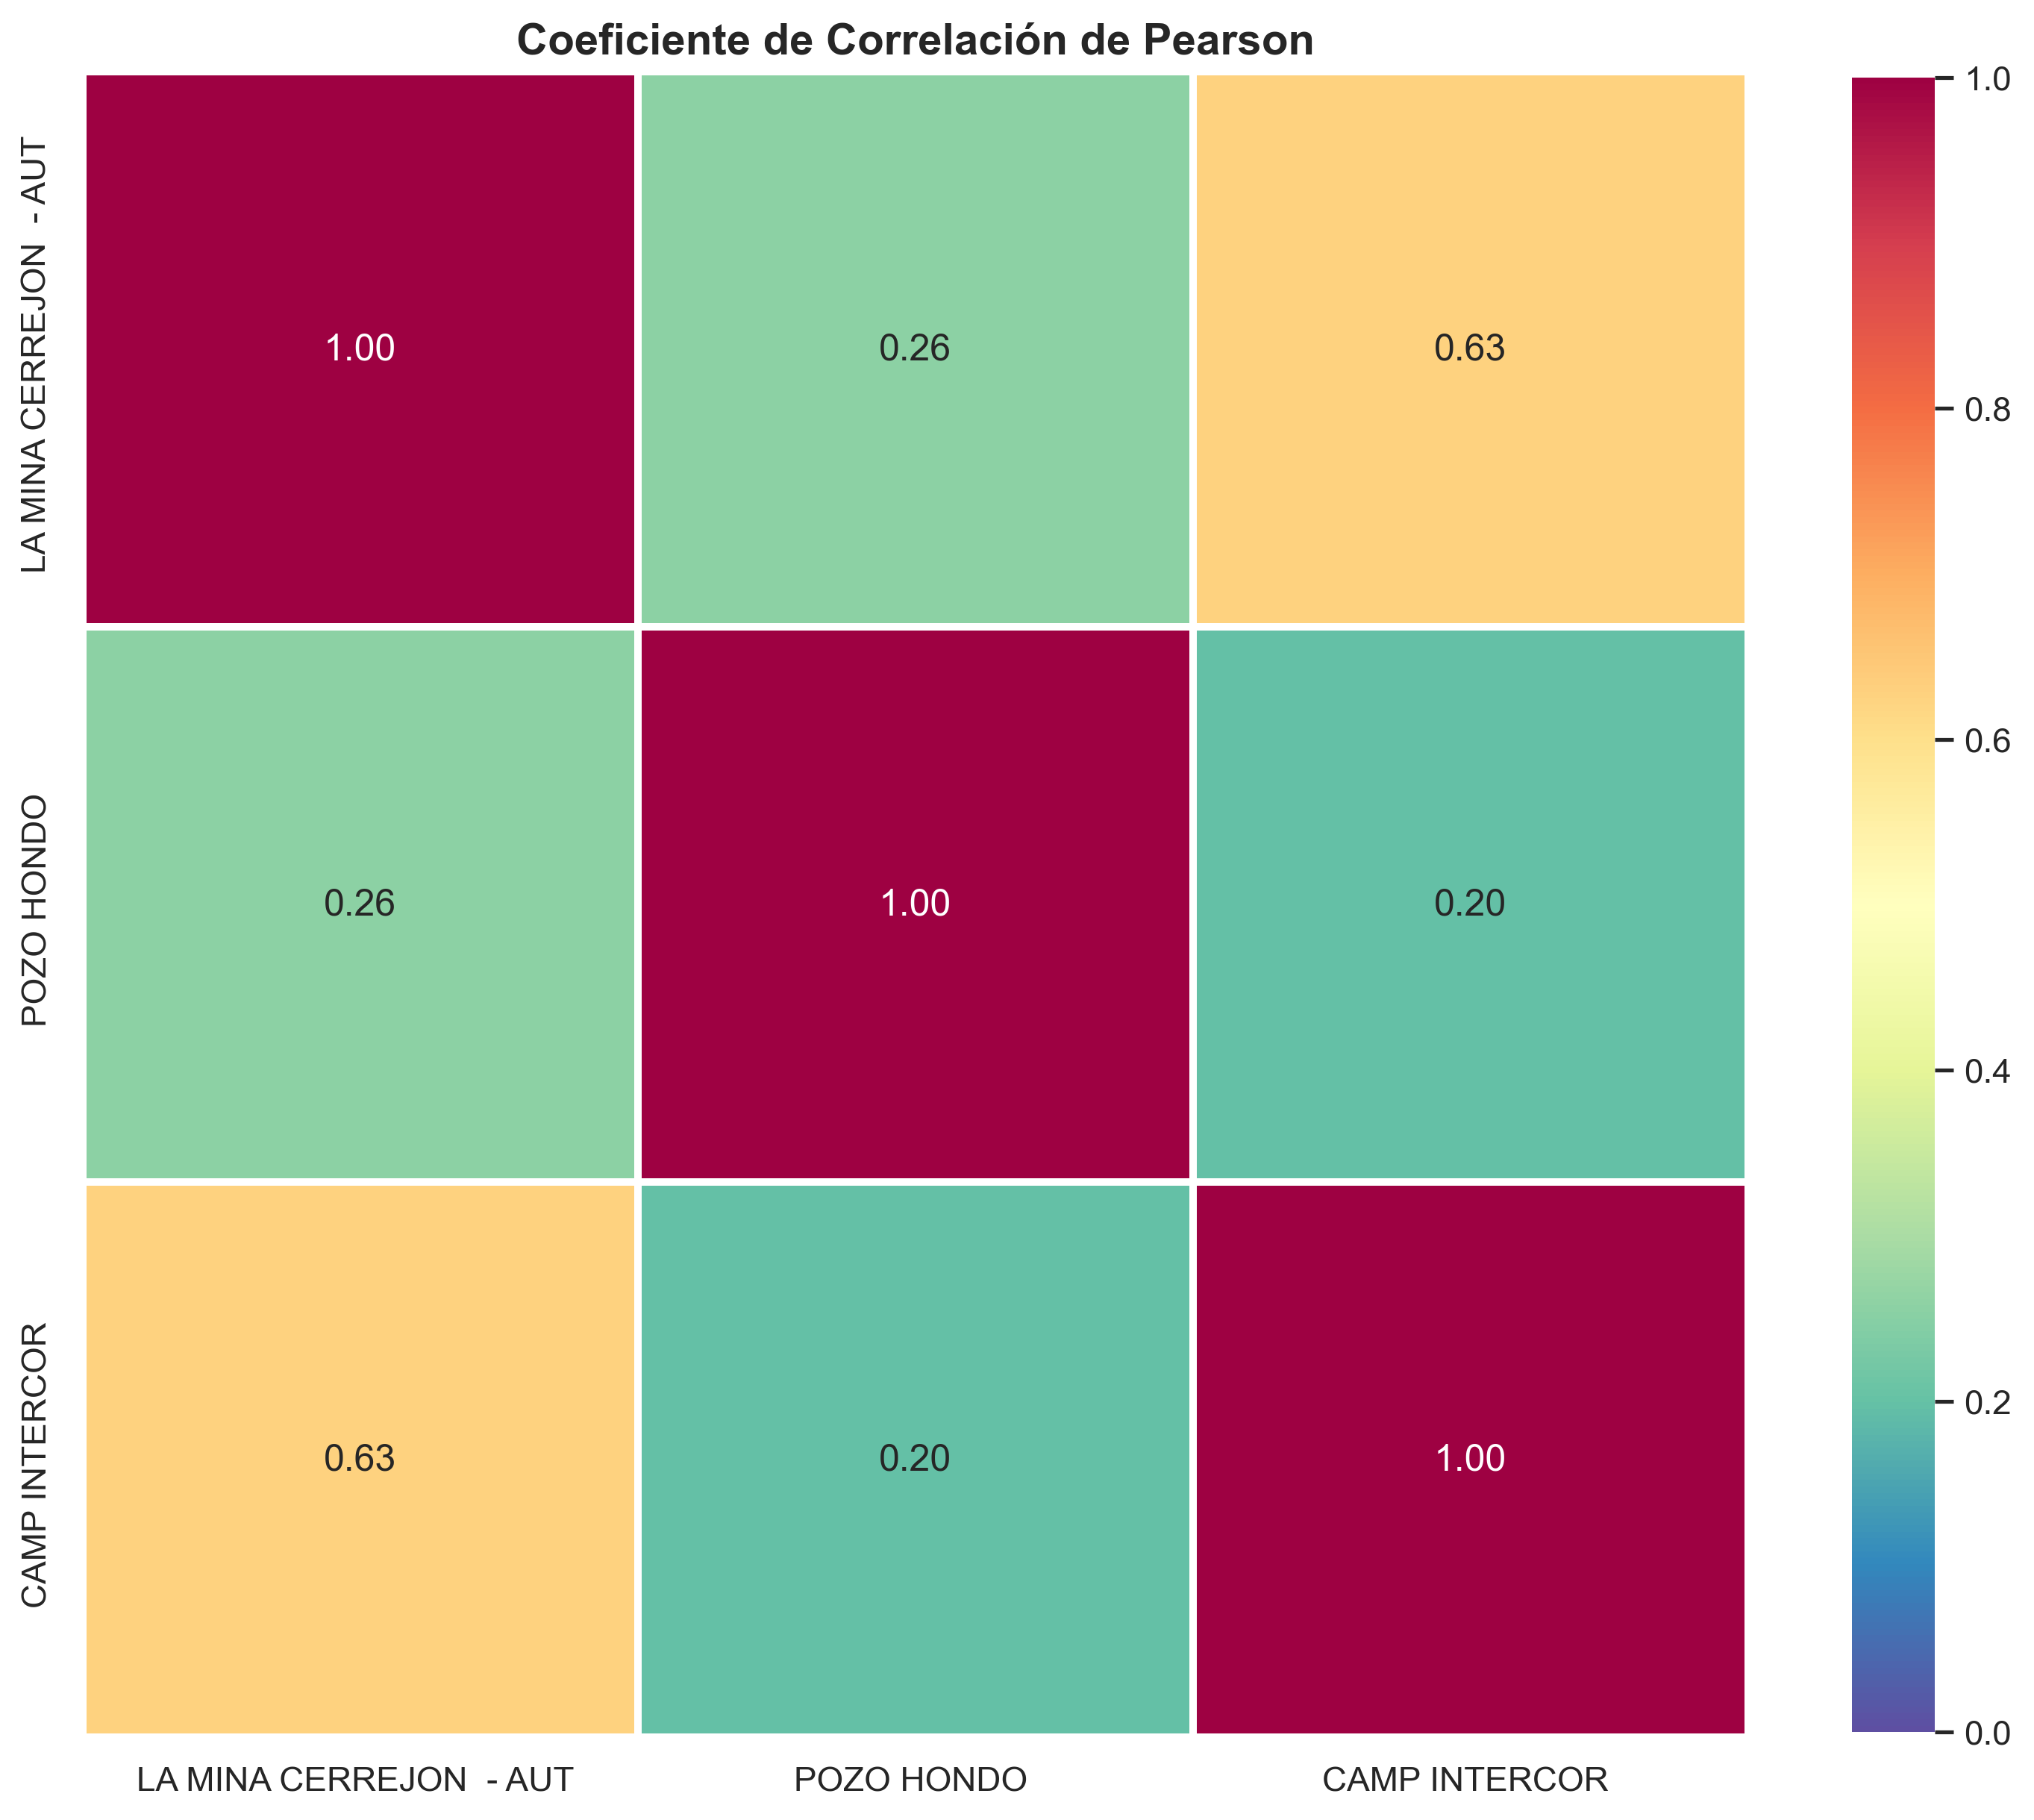

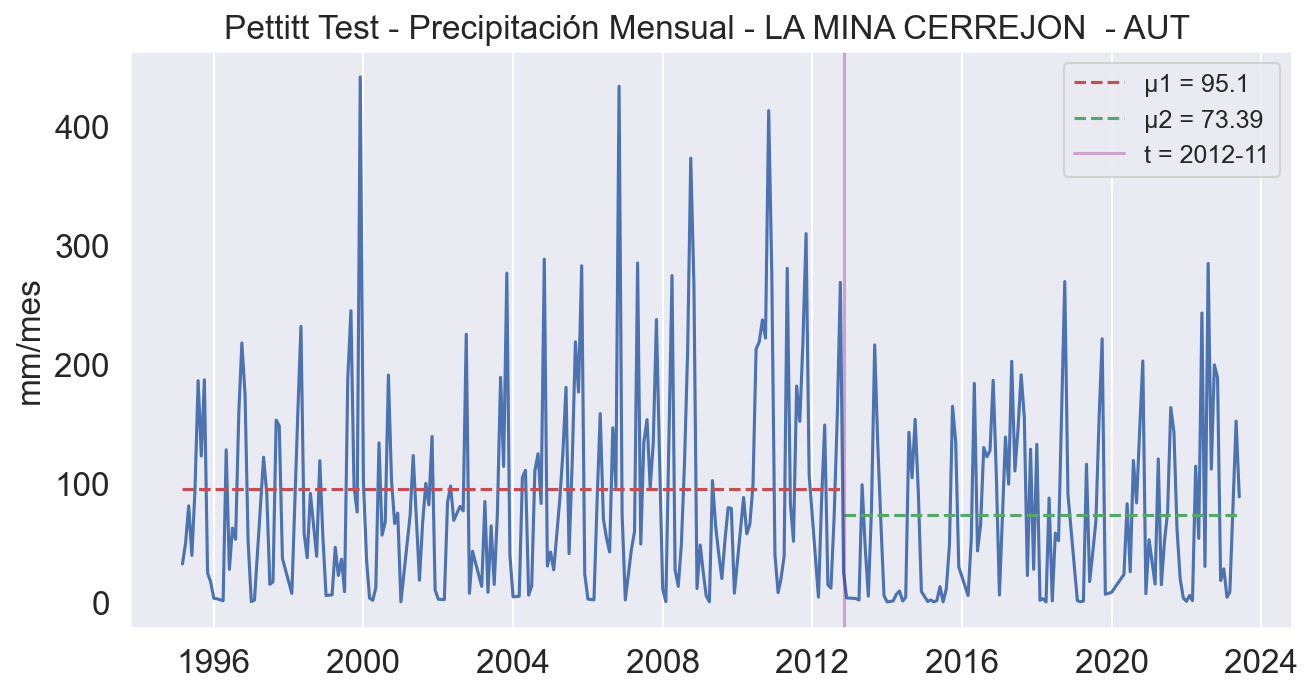

10408


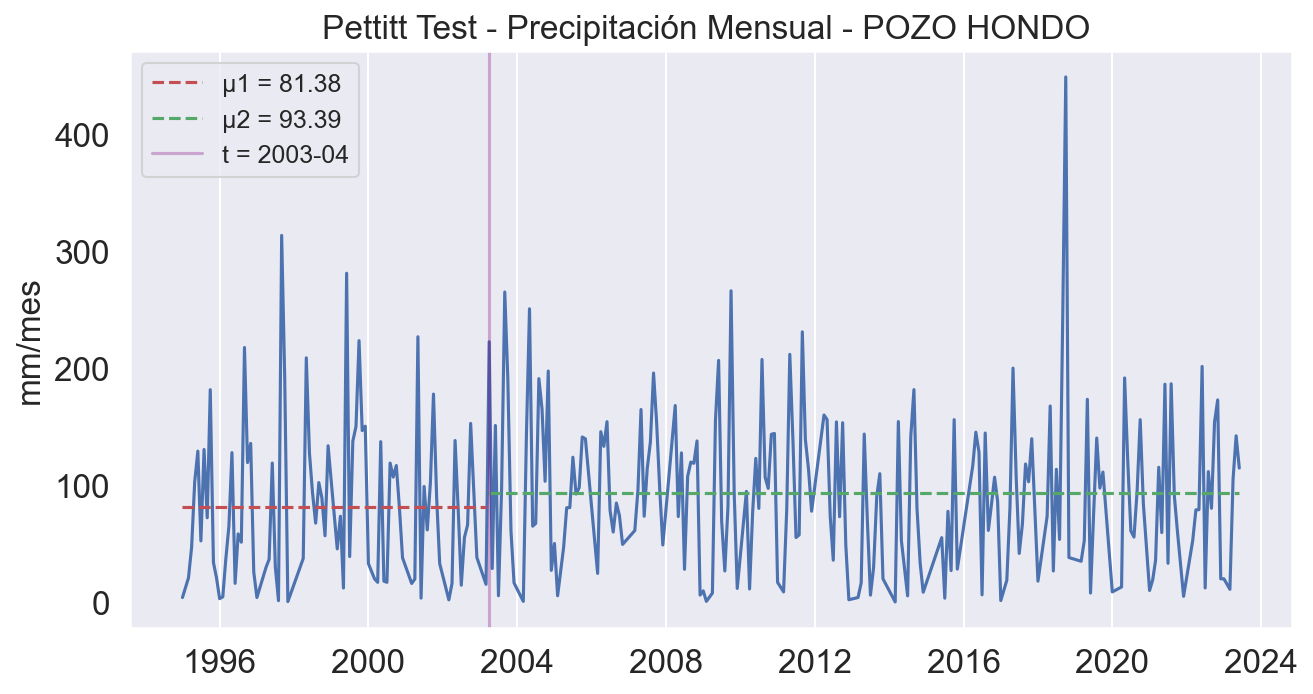

10408


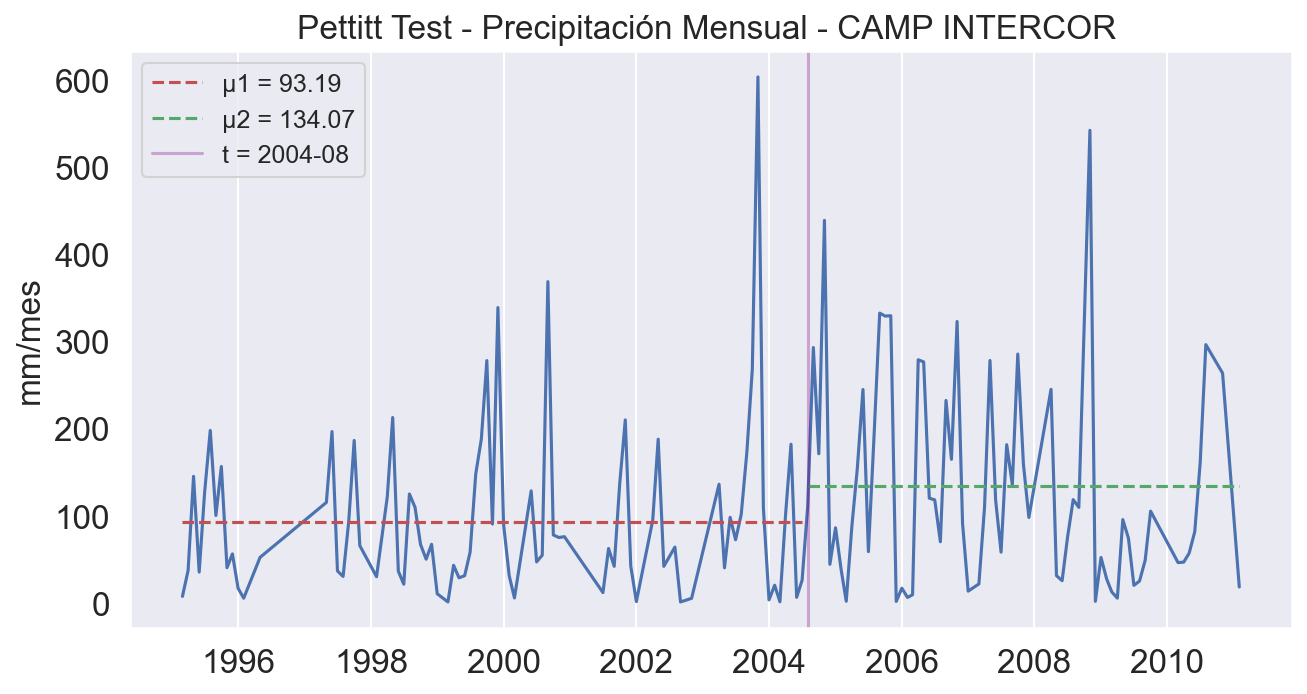

                               Fecha        Valor
count                           1669  1669.000000
mean   2008-11-18 00:37:06.003595008    14.622289
min              1995-03-13 00:00:00     0.100000
25%              2002-08-26 00:00:00     1.700000
50%              2008-11-15 00:00:00     7.300000
75%              2014-12-08 00:00:00    19.300000
max              2023-06-26 00:00:00   133.800000
std                              NaN    19.857038


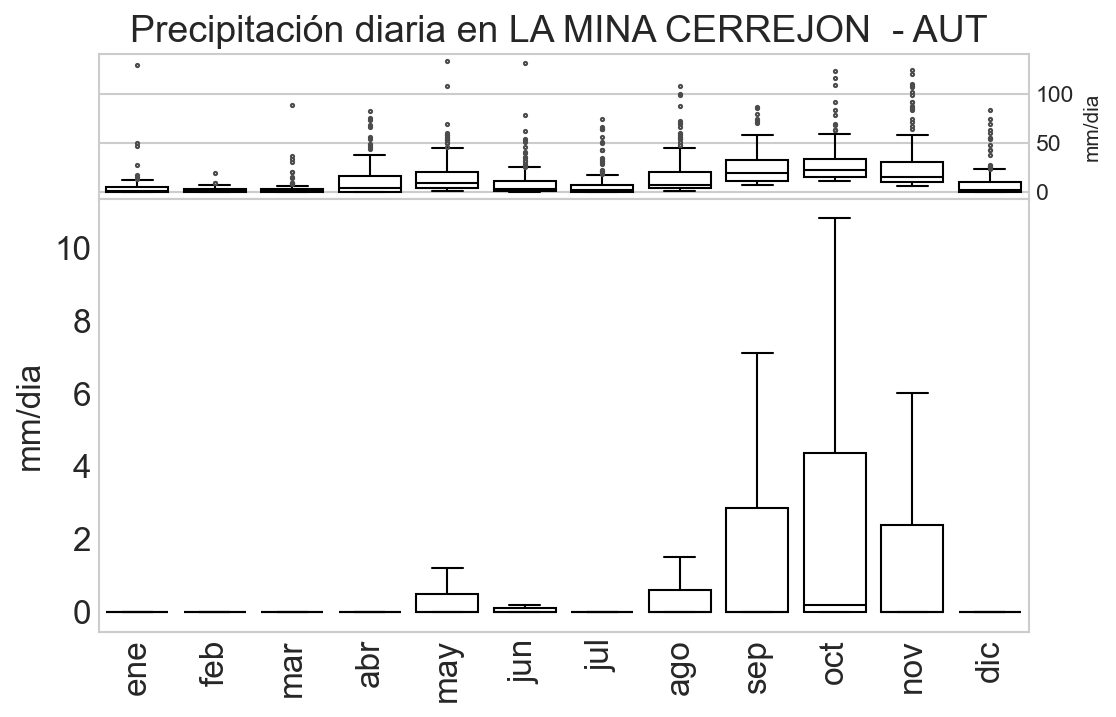

                               Fecha        Valor
count                           1428  1428.000000
mean   2009-02-16 04:32:16.134453760    16.593627
min              1995-01-15 00:00:00     0.200000
25%              2002-04-02 06:00:00     4.600000
50%              2008-08-20 00:00:00    10.450000
75%              2016-10-08 06:00:00    21.700000
max              2023-06-29 00:00:00   133.800000
std                              NaN    17.787010


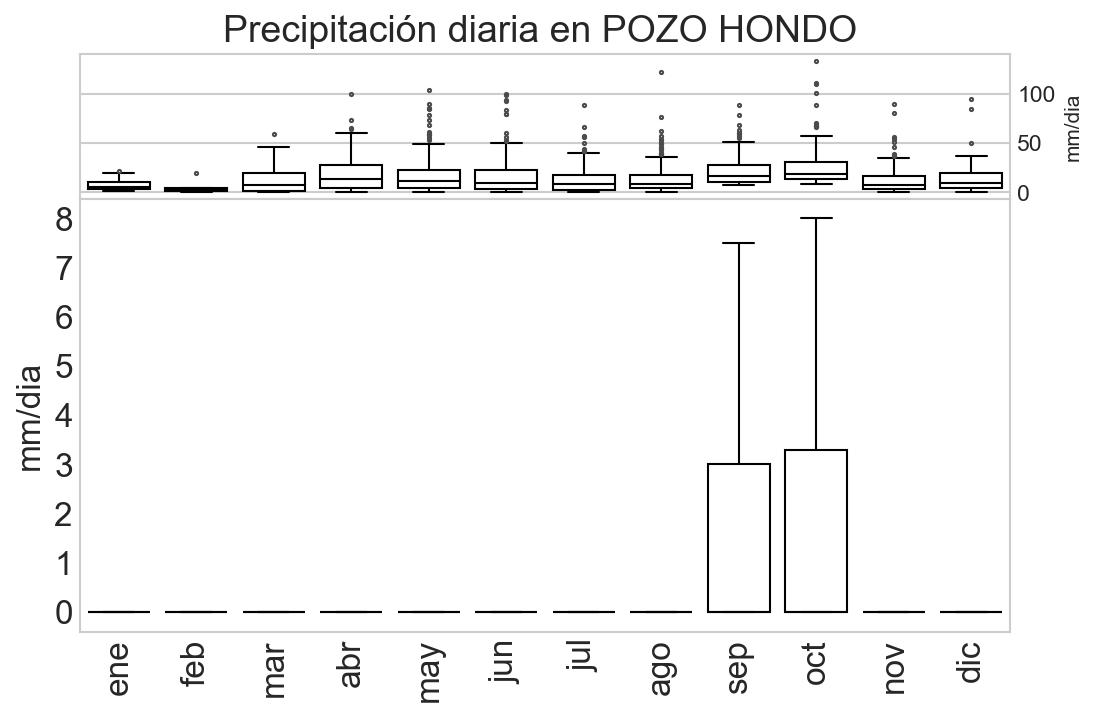

                               Fecha       Valor
count                            802  802.000000
mean   2003-10-09 12:05:23.192019968   18.707107
min              1995-03-13 00:00:00    0.100000
25%              1999-12-12 12:00:00    3.600000
50%              2004-08-25 00:00:00   11.000000
75%              2007-04-19 18:00:00   25.000000
max              2011-02-27 00:00:00  136.000000
std                              NaN   21.838550


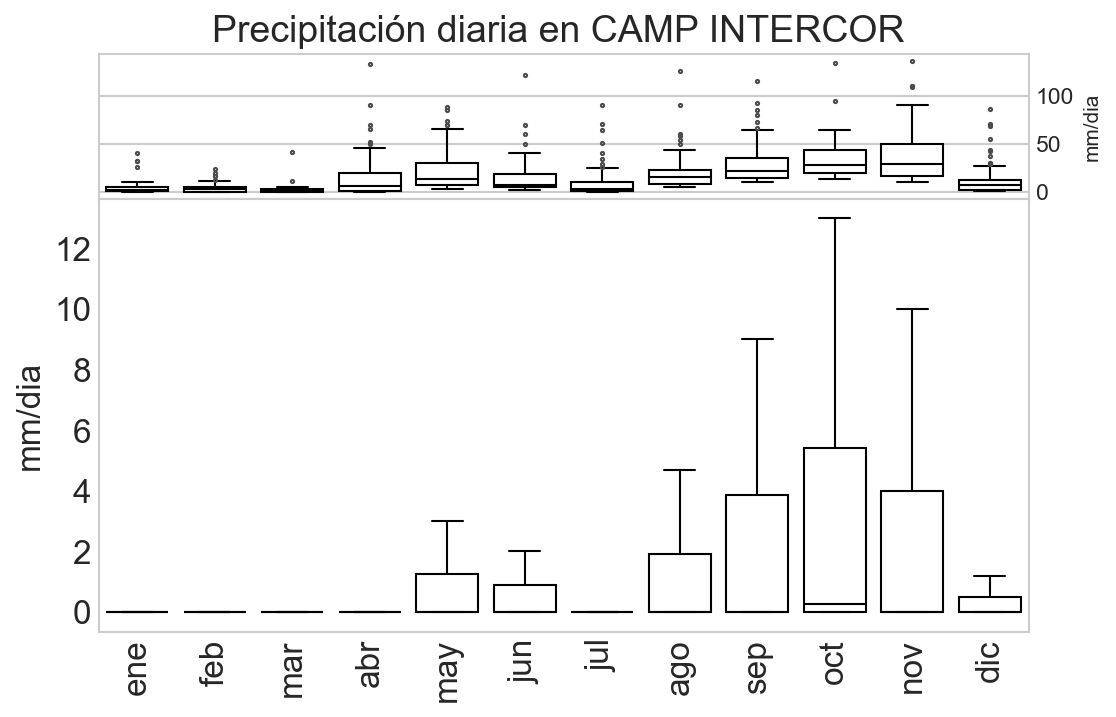

           Valores
count  7753.000000
mean     16.772199
std      27.279168
min       0.200000
25%       2.500000
50%       7.000000
75%      18.700000
max     150.000000


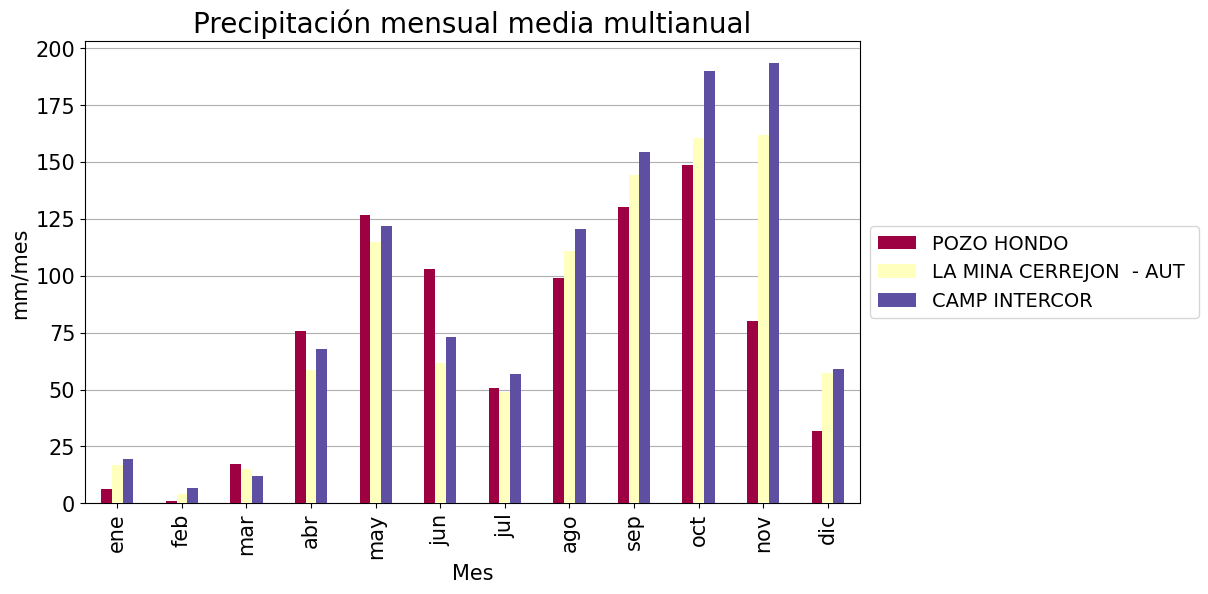

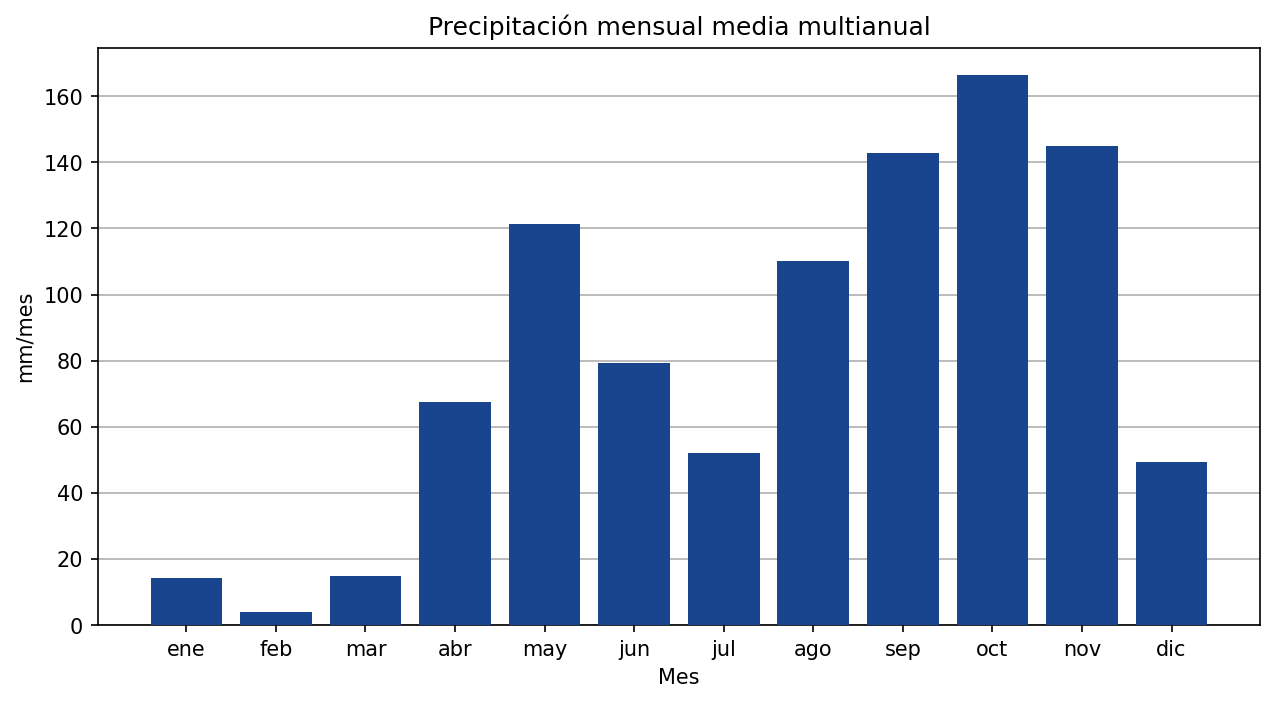

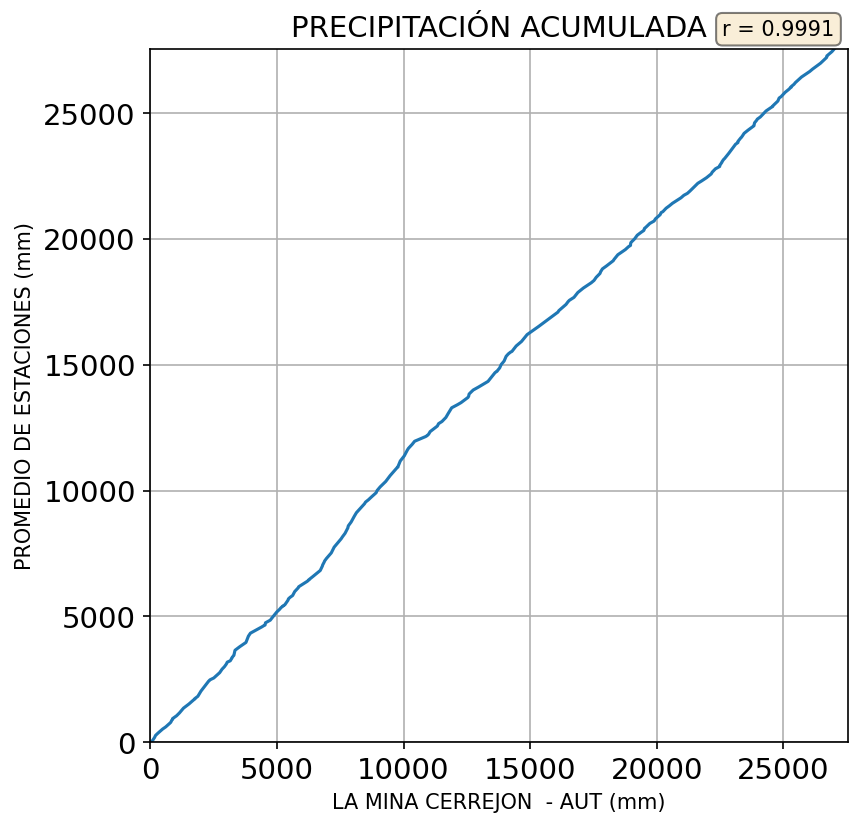

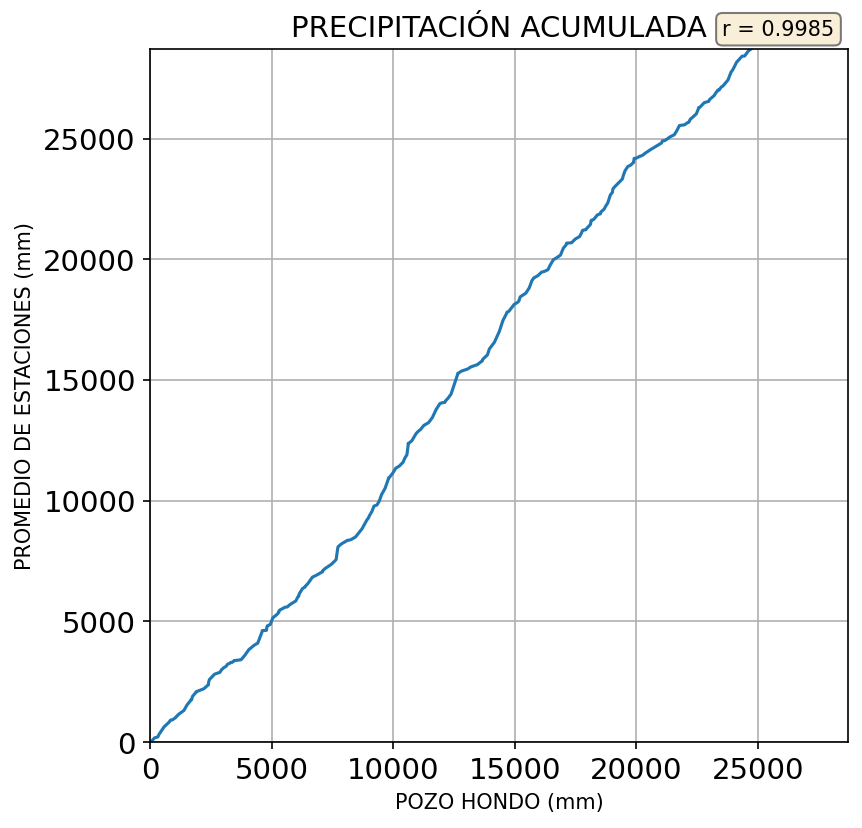

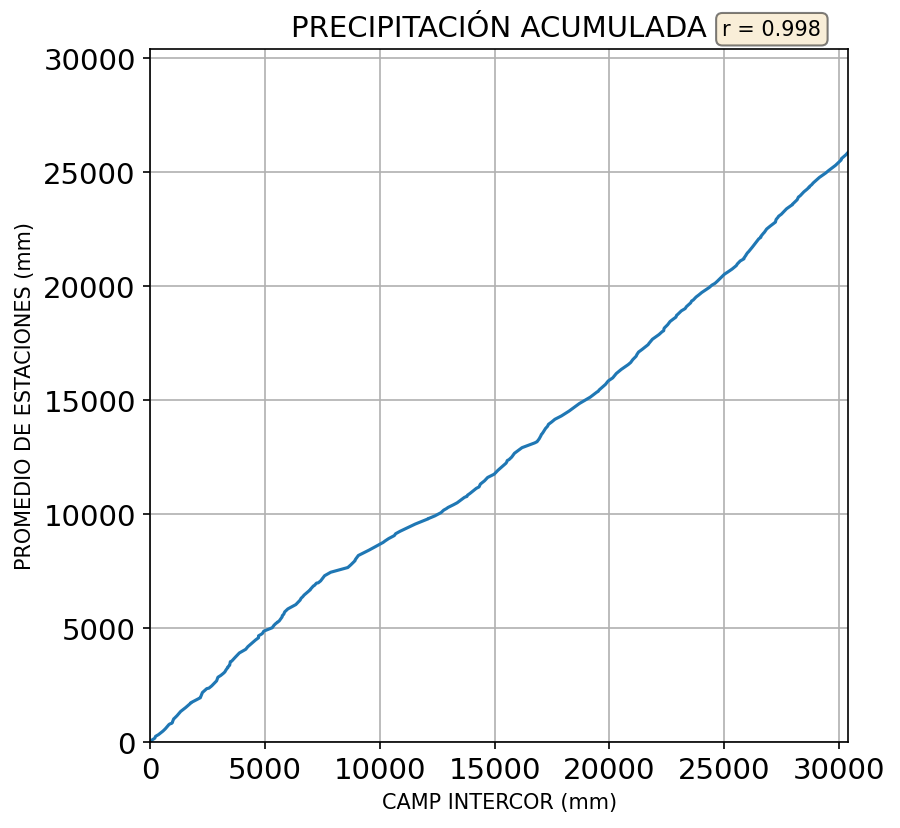

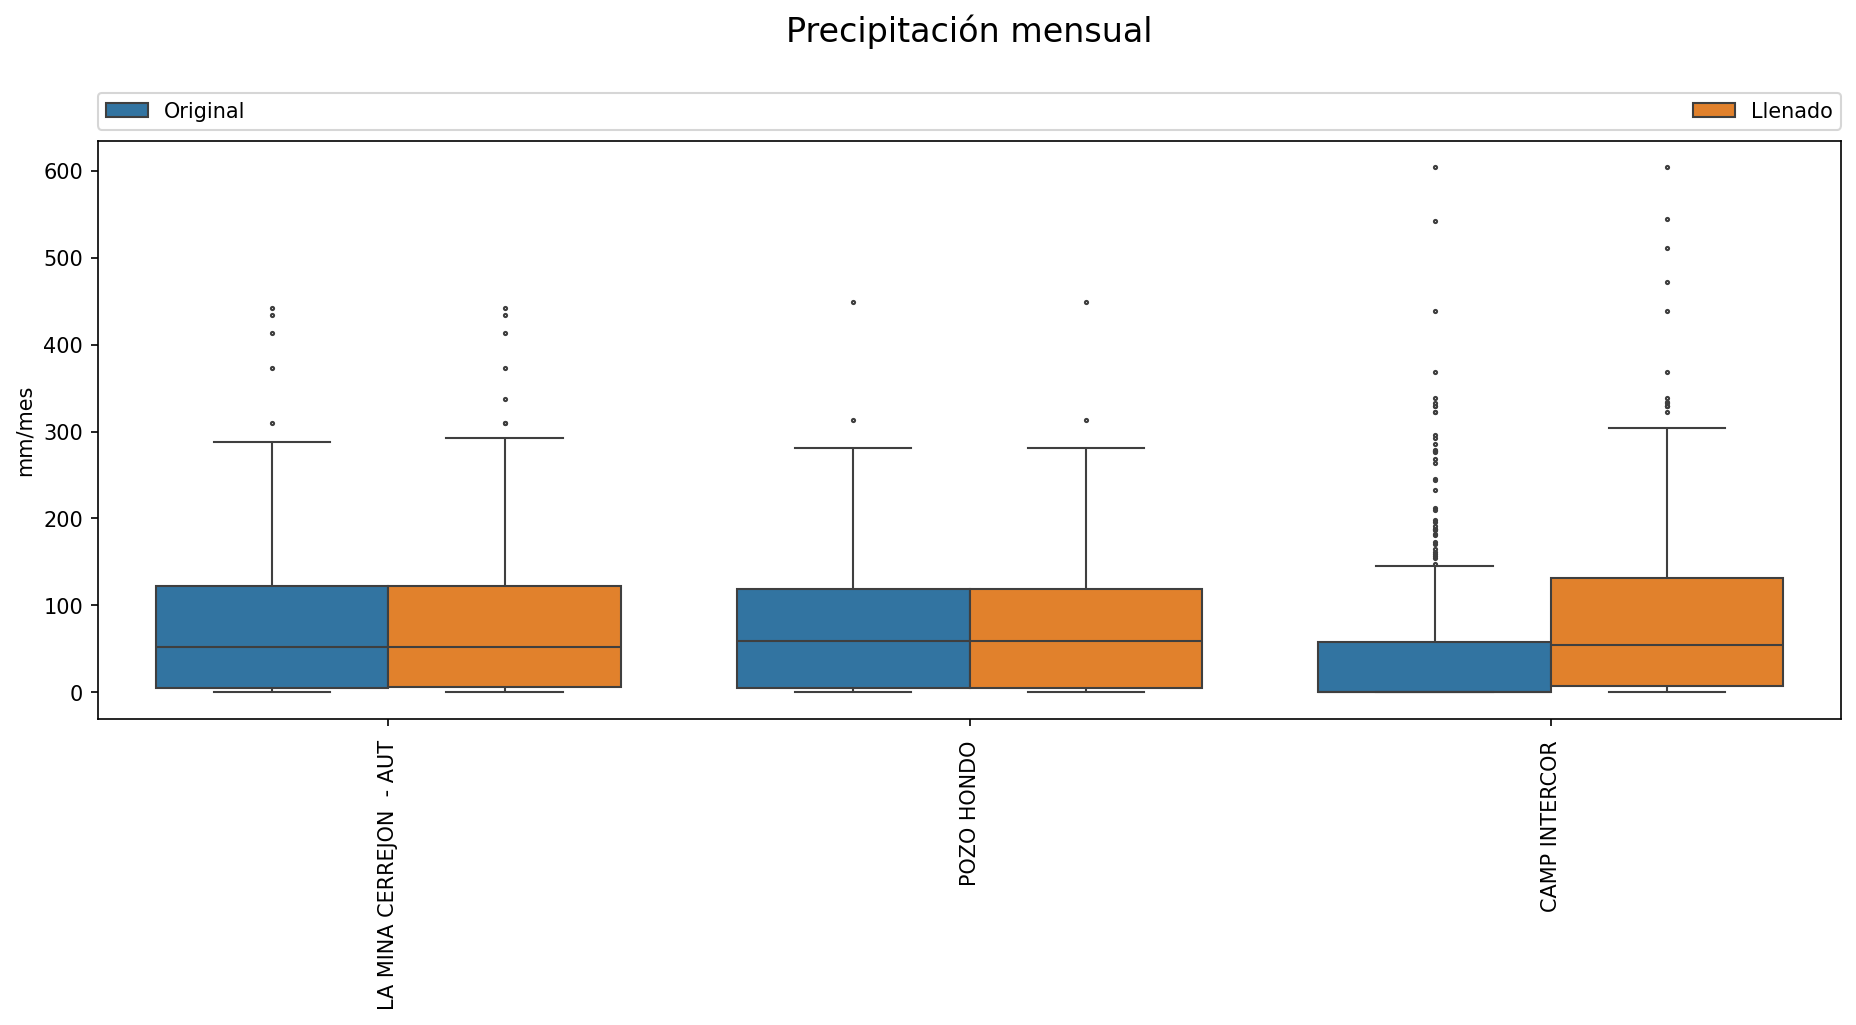

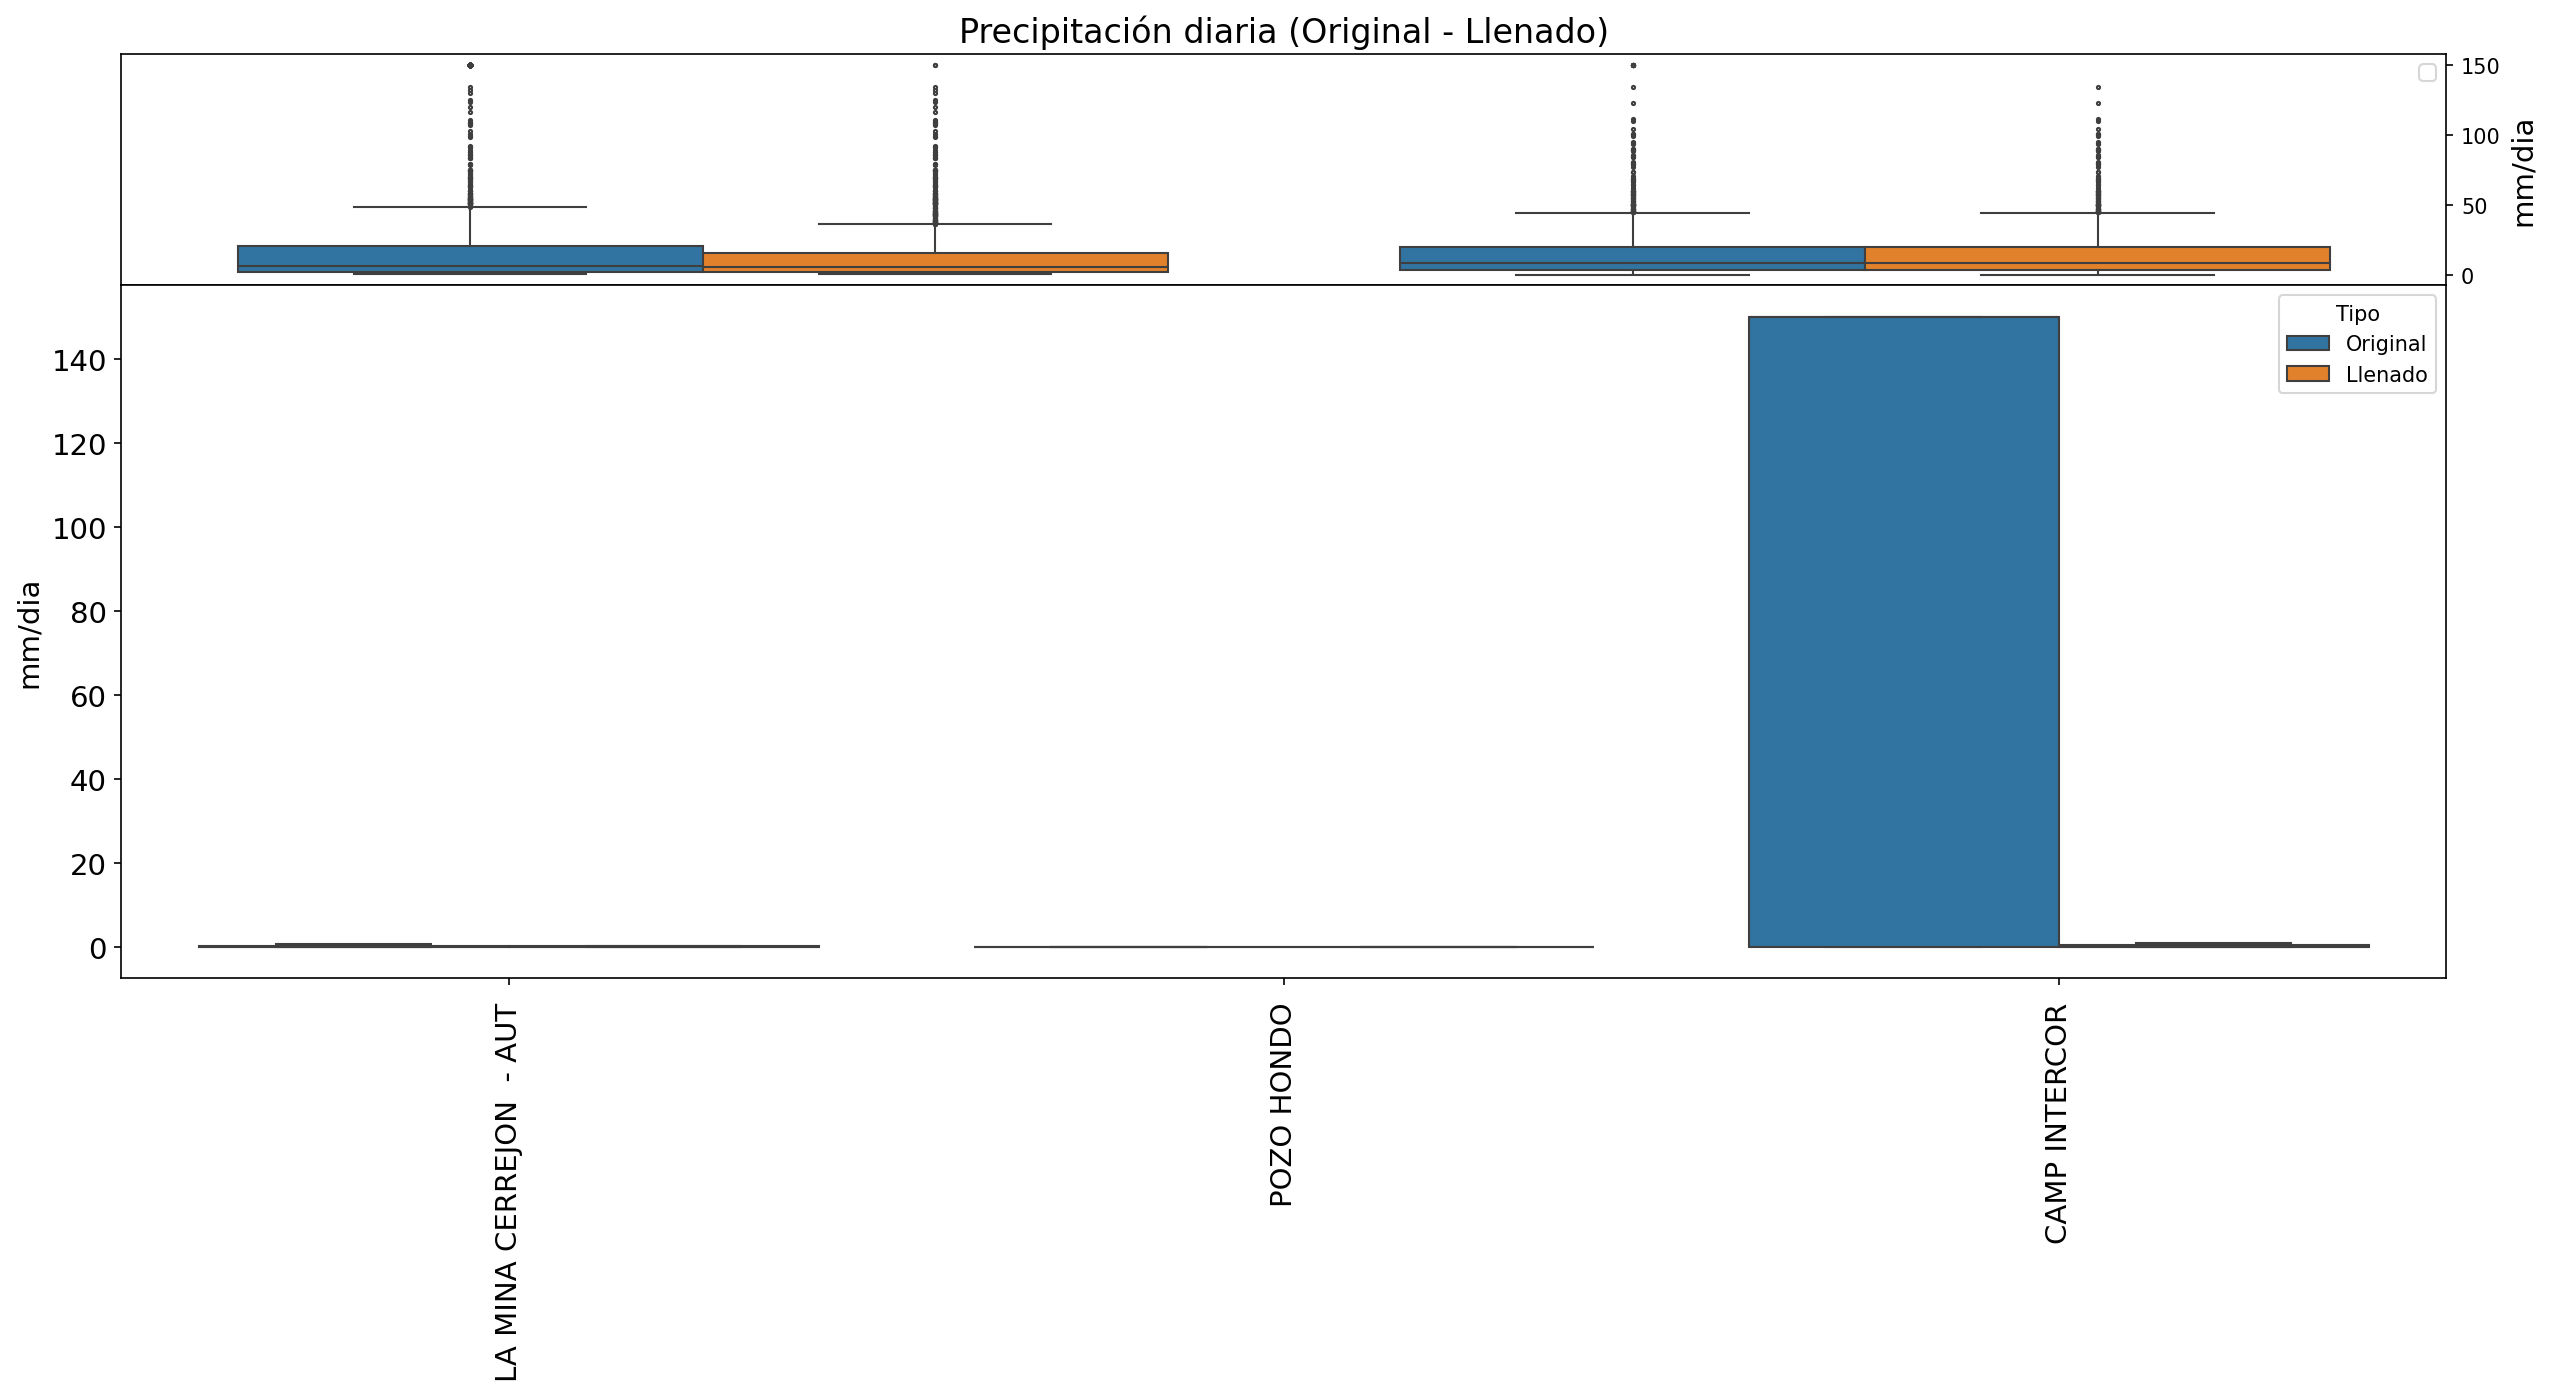

In [1]:
import pandas as pd
import numpy as np
import os
import sys

if __name__ == "__main__":
    '''Modulo principal para correr todos los códigos'''
    
    from DATA_LLENADO import llenado
    from DATA_COMPLETA import completar_data
    from GRAFICAR_DATOS_FALTANTES import datos_faltantes
    from GRAFICAR_CORRELACION import correlacion
    from CORRECCION_DATA import correccion
    from PRUEBA_HOMOGENEIDAD import test_pettitt
    from BOXPLOT import boxplots
    from MENSUAL_MULTIANUAL import mensual_multianual
    from CURVAS_DOBLE_MASA import curvas_doble_masa
    from BXP_COMPARACION import bxp_mes
    from BXP_COMPARACION import bxp_anio


    rango_tiempo = ['1995-01-01','2023-06-30']   #Fechas del periodo de tiempo a evaluar
    var = 'PRE'   # Variable a evaluar. Si es precipitación marcar como 'PRE', si es temperatura marcar como 'TEM'
    file_data = "../datos/"  #Carpeta de ubicación de los datos, cada estación en un csv por separado, el nombre del csv es el mismo de la estación
    
    lista_files = [i for i in os.listdir(file_data) if i != '.DS_Store']  #Seleccionar CSVs y excluir archivo oculto de macOS.
    
    llenado(file_data, lista_files,rango_tiempo,var)
    completar_data(file_data, lista_files,rango_tiempo,var)
    datos_faltantes(lista_files,rango_tiempo,var)
    correlacion(lista_files,rango_tiempo,var)
    correccion(lista_files,rango_tiempo,var) 
    test_pettitt(lista_files,var)
    boxplots(lista_files,var) 
    mensual_multianual(lista_files,'estaciones',var)
    mensual_multianual(lista_files,'global',var)
    curvas_doble_masa(lista_files) #Solo para precipitación
    bxp_mes(lista_files) #Solo para precipitación
    bxp_anio(lista_files) #Solo para precipitación

In [97]:
import pandas as pd
import numpy as np
import os
import sys

rango_tiempo = ['1995-01-01','2023-06-30']   #Fechas del periodo de tiempo a evaluar
var = 'PRE'   # Variable a evaluar. Si es precipitación marcar como 'PRE', si es temperatura marcar como 'TEM'
file_data = "../datos/"  #Carpeta de ubicación de los datos, cada estación en un csv por separado, el nombre del csv es el mismo de la estación
    
lista_files = [i for i in os.listdir(file_data) if i != '.DS_Store']

In [98]:
data = pd.read_csv('../PRE_SALIDAS/DATA_LLENADO/LA MINA CERREJON  - AUT [15065501].csv'); data = data[['Fecha', 'Valor']]; data = data.set_index('Fecha');data.index = pd.to_datetime(data.index)

In [99]:
data

,Valor
Fecha,
1995-01-01,0.0
1995-01-02,0.0
1995-01-03,0.0
1995-01-04,0.0
1995-01-05,0.0
...,...
2023-06-26,50.9
2023-06-27,0.0
2023-06-28,0.0


In [113]:
data["mes"] = data.index.strftime("%b")
meses = list(data["mes"].unique())

In [116]:
mes = "Jan"
data_mes = data[data["mes"] == mes]

In [118]:
data_mes

,Valor,mes
Fecha,,
1995-01-01,0.0,Jan
1995-01-02,0.0,Jan
1995-01-03,0.0,Jan
1995-01-04,0.0,Jan
1995-01-05,0.0,Jan
...,...,...
2023-01-27,0.0,Jan
2023-01-28,0.0,Jan
2023-01-29,0.0,Jan


In [4]:
len(data)

10408

In [17]:

t = walsh_test(sorted(data["Valor"]),200)

small:  []


In [19]:
len(t)

143

In [6]:
alpha = 0.05
r = 200

In [4]:
data = data["Valor"]
data = sorted(data)

In [12]:
r

200

In [9]:
data

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [92]:
import numpy as np

# Crear una lista con 100 valores aleatorios que sigan una distribución normal
mu, sigma = 0, 1  # media y desviación estándar
n = 100
data_normal = np.random.normal(mu, sigma, n)

# Introducir 3 datos atípicos
outliers = [10, -5, 15]  # Valores de los datos atípicos
for outlier in outliers:
    index = np.random.randint(0, n)  # Elegir una posición aleatoria en la lista
    data_normal[index] = outlier  # Reemplazar el valor en esa posición con el dato atípico

print(data_normal)

[ 5.78533267e-01  1.35851173e+00 -1.61580867e-01  6.40578192e-01
  1.06830301e+00  1.25707290e-01 -7.76656432e-01 -1.92758114e-01
  5.04336899e-01 -5.32186439e-02 -5.10985915e-01  5.45219722e-01
  9.76149652e-02 -5.84117219e-01  1.61335462e+00  7.28896285e-01
  1.86508897e+00  6.83869397e-02 -1.53095047e+00 -1.24361821e+00
 -2.99467664e-01 -1.48802643e+00 -3.76587116e-01  7.15684197e-01
  5.11082589e-01 -3.10155633e-01 -1.45496793e-01  8.94508611e-01
  4.34623270e-01 -5.02742701e-01  4.27154525e-01  2.89199466e-01
 -1.07547835e+00  1.65250111e+00 -6.36501128e-02  3.16765228e-01
  9.92567770e-02 -1.50252477e+00  4.07932369e-01  5.38583862e-01
 -2.86977473e-01  2.48095067e-01  8.38702026e-02 -2.20543544e+00
 -3.67388902e-01 -1.73089235e-01 -8.49419887e-01 -8.49929493e-01
  7.24262530e-01  2.03797299e+00  7.91521640e-01 -3.45597202e-01
  3.00646735e-02 -7.70458205e-02  1.08572035e+00  1.00000000e+01
  8.97949948e-01  3.69764980e-01 -7.98587934e-01 -1.35881037e+00
  1.50000000e+01  1.09056

In [93]:
data_normal.min()

-5.0

In [94]:
data = sorted(data_normal)

In [95]:
n = len(data)
    
if n <= 60:
    print("Sample size is too small. Walsh's test should not be applied.")
    #return []
elif n <= 220:
    alpha = 0.10
    
c = int(np.ceil(np.sqrt(2 * n)))
b2 = 1/alpha
b = np.sqrt(b2)
a = (1+b*np.sqrt((c-b2)/(c-1)))/(c-b2-1)
    
# Step 1: Check if the r smallest points are outliers
for i in range(n):
    k = i + c
    if data[i] - (1 + a) * data[i + 1] + a * data[k] < 0:
        outliers_small.append(i)
    elif data[i] - (1 + a) * data[i + 1] + a * data[k] >= 0:
        if i > 0:
            thrs_outlier_small =  data[i - 1]
        else:
            thrs_outlier_small =  None
        break
    
# Step 2: Check if the r largest points are outliers
for i in range(n,0, -1): 
    k = i + c
    if data[n+1-i] - (1 + a) * data[n - i] + a * data[n +1- k] <= 0:
        if i < n-1:
            thrs_outlier_large = data[i + 1]
        elif i == n-1:
            thrs_outlier_large = None
        break
    
# Step 3: Combine small and large thrs
outliers = {"thrs_small":thrs_outlier_small, "thrs_large": thrs_outlier_large}

In [96]:
outliers

{'thrs_small': -5.0, 'thrs_large': 1.0683030057401637}

In [74]:
i

99

In [73]:
n

100

In [62]:
outliers

{'thrs_small': None, 'thrs_large': 44.6}

In [51]:
data[0-1]

157.4

In [38]:
data[10209]

34.8

In [39]:
data[10264]

44.6

In [34]:
outliers

[10265,
 10266,
 10267,
 10268,
 10269,
 10270,
 10271,
 10272,
 10273,
 10274,
 10275,
 10276,
 10277,
 10278,
 10279,
 10280,
 10281,
 10282,
 10283,
 10284,
 10285,
 10286,
 10287,
 10288,
 10289,
 10290,
 10291,
 10292,
 10293,
 10294,
 10295,
 10296,
 10297,
 10298,
 10299,
 10300,
 10301,
 10302,
 10303,
 10304,
 10305,
 10306,
 10307,
 10308,
 10309,
 10310,
 10311,
 10312,
 10313,
 10314,
 10315,
 10316,
 10317,
 10318,
 10319,
 10320,
 10321,
 10322,
 10323,
 10324,
 10325,
 10326,
 10327,
 10328,
 10329,
 10330,
 10331,
 10332,
 10333,
 10334,
 10335,
 10336,
 10337,
 10338,
 10339,
 10340,
 10341,
 10342,
 10343,
 10344,
 10345,
 10346,
 10347,
 10348,
 10349,
 10350,
 10351,
 10352,
 10353,
 10354,
 10355,
 10356,
 10357,
 10358,
 10359,
 10360,
 10361,
 10362,
 10363,
 10364,
 10365,
 10366,
 10367,
 10368,
 10369,
 10370,
 10371,
 10372,
 10373,
 10374,
 10375,
 10376,
 10377,
 10378,
 10379,
 10380,
 10381,
 10382,
 10383,
 10384,
 10385,
 10386,
 10387,
 10388,
 10389,


In [40]:
outliers

[10265,
 10266,
 10267,
 10268,
 10269,
 10270,
 10271,
 10272,
 10273,
 10274,
 10275,
 10276,
 10277,
 10278,
 10279,
 10280,
 10281,
 10282,
 10283,
 10284,
 10285,
 10286,
 10287,
 10288,
 10289,
 10290,
 10291,
 10292,
 10293,
 10294,
 10295,
 10296,
 10297,
 10298,
 10299,
 10300,
 10301,
 10302,
 10303,
 10304,
 10305,
 10306,
 10307,
 10308,
 10309,
 10310,
 10311,
 10312,
 10313,
 10314,
 10315,
 10316,
 10317,
 10318,
 10319,
 10320,
 10321,
 10322,
 10323,
 10324,
 10325,
 10326,
 10327,
 10328,
 10329,
 10330,
 10331,
 10332,
 10333,
 10334,
 10335,
 10336,
 10337,
 10338,
 10339,
 10340,
 10341,
 10342,
 10343,
 10344,
 10345,
 10346,
 10347,
 10348,
 10349,
 10350,
 10351,
 10352,
 10353,
 10354,
 10355,
 10356,
 10357,
 10358,
 10359,
 10360,
 10361,
 10362,
 10363,
 10364,
 10365,
 10366,
 10367,
 10368,
 10369,
 10370,
 10371,
 10372,
 10373,
 10374,
 10375,
 10376,
 10377,
 10378,
 10379,
 10380,
 10381,
 10382,
 10383,
 10384,
 10385,
 10386,
 10387,
 10388,
 10389,


In [16]:
len(outliers)

144